# Ordinary Least Squares on Time
The first class of models investigated is simple OLS on functions of time, i.e. the response $y(t)$ is modelled as
$$y(t) = \sum_{i=0}^n \beta_i \cdot f_i(t) + \epsilon_t$$
where $f_i$ are functions of the time, weighted by the parameters $\beta_i$ (to be estimated by OLS) and $\epsilon_t$ denotes the error term. This class of models can capture time-dependent changes and seasonality (dependending on the regressor functions), but it completely ignores autocorrelation, i.e. cross-temporal dependencies,

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from australian_housing import paths
from australian_housing.models.ols_model import polynom_regressor, fit_ols, history_and_prediction_plot

In [3]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0, parse_dates=[0])

In [4]:
help(polynom_regressor)

Help on function polynom_regressor in module australian_housing.models.ols_model:

polynom_regressor(order)
    Returns a regressor function containing a polynom of order order.



## Linear Model
The simplest type in the OLS class of models is the linear model with $f_0(t) = 1$ and $f_1(t) = t$, i.e. $y(t)$ is modelled as $y(t) = \beta_0 + \beta_1 \cdot t$.

In [5]:
regr = polynom_regressor(order=1)

In [6]:
model_fit = fit_ols(ts, regr)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     138.1
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           2.58e-18
Time:                        16:11:33   Log-Likelihood:                -515.72
No. Observations:                  73   AIC:                             1035.
Df Residuals:                      71   BIC:                             1040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.506e+05   3.85e+04    -11.698      0.000   -5.27e+05   -3.74e+05
x1           224.6639     19.120     11.750      0.000     186.540     262.788
==============================================================================
Omnibus:                       11.462   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.231
Skew:                          -0.804   Prob(JB):                      0.00221
Kurtosis:                       4.198   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

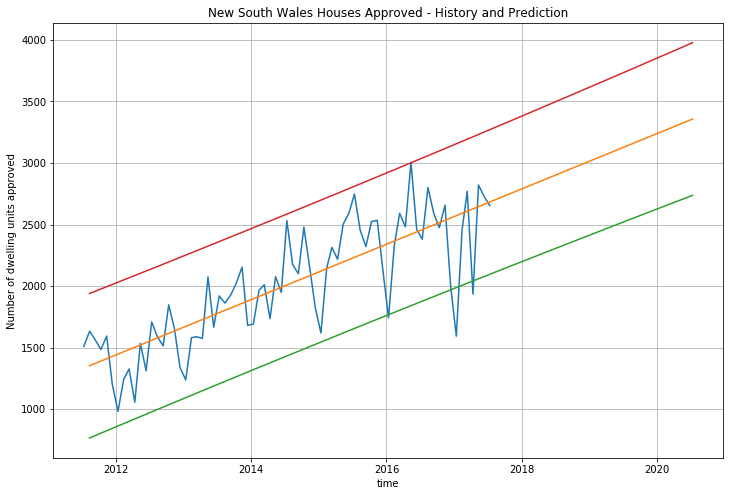

In [7]:
fig = plt.figure(figsize=(12,8))
history_and_prediction_plot(fig, ts, model_fit, regr, '2020-07-01', 'M', 0.05);

The plot of the linear model shows a non-surprising upwards trend. It cannot capture the diminishing growth in 2017. The confidence intervals cannot capture the increasing uncertainty of future predictions as with all OLS models.

The summary of the model fit shows highly significant intercept and slope. $R^2$ at 66% indicates a notable amount of variation cannot be explained by this model. There is also a warning about multicollinearity; this is inherent to the OLS approach on functions of the time axis and cannot easily fixed. 

Adding a quadratic term to the linear model with allows to capture a curvature in time trend. This can be found in [Quadratic Model](4.1-Quadractic-model.ipynb).